## Activity-01
### Group-3
##### Priyanka Gandhi 
##### Bhuma Poorna Sasi Lakshmi Sai Sree
##### Jainam Shah
##### Suma Marri

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from math import log

In [2]:
#Importing Data File
data_file=pd.read_csv('LOGITData.csv')

In [3]:
data_file

,Fireplaces,SalePrice,LotArea,BsmtFinSF1
0,0,208500,8450,706
1,1,181500,9600,978
2,1,223500,11250,486
3,1,140000,9550,216
4,1,250000,14260,655
...,...,...,...,...
1455,1,175000,7917,0
1456,2,210000,13175,790
1457,2,266500,9042,275
1458,0,142125,9717,49


In [4]:
#obtaining rank of each case based on their sale price
# creating a rank column and passing the returned rank series
data_file["Rank"] = data_file["SalePrice"].rank()

In [5]:
data_file

,Fireplaces,SalePrice,LotArea,BsmtFinSF1,Rank
0,0,208500,8450,706,1072.0
1,1,181500,9600,978,909.0
2,1,223500,11250,486,1135.5
3,1,140000,9550,216,499.5
4,1,250000,14260,655,1239.5
...,...,...,...,...,...
1455,1,175000,7917,0,832.0
1456,2,210000,13175,790,1078.0
1457,2,266500,9042,275,1285.0
1458,0,142125,9717,49,524.0


In [6]:
# sorting w.r.t saleprice column
data_file.sort_values("SalePrice", ascending=True)

,Fireplaces,SalePrice,LotArea,BsmtFinSF1,Rank
495,0,34900,7879,495,1.0
916,0,35311,9000,50,2.0
968,0,37900,5925,0,3.0
533,0,39300,5000,0,4.0
30,0,40000,8500,0,5.0
...,...,...,...,...,...
803,1,582933,13891,0,1456.0
898,2,611657,12919,2188,1457.0
1169,1,625000,35760,1387,1458.0
1182,2,745000,15623,2096,1459.0


<AxesSubplot:ylabel='Frequency'>

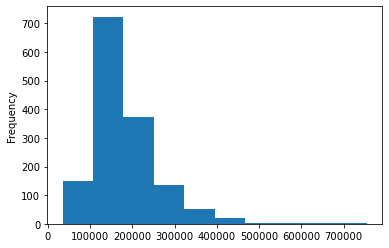

In [7]:
#Plotted the Saleprice Distribution
data_file['SalePrice'].plot(kind='hist')

In [8]:
data_file['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
#Partitinoning into 25 bins
pd.qcut(data_file['SalePrice'], q=25)

0        (204360.0, 215872.0]
1        (179280.0, 185690.0]
2        (215872.0, 230000.0]
3        (138000.0, 142500.0]
4        (244824.0, 266460.0]
                ...          
1455     (173904.0, 179280.0]
1456     (204360.0, 215872.0]
1457    (266460.0, 295914.96]
1458     (138000.0, 142500.0]
1459     (147000.0, 153572.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (25, interval[float64, right]): [(34899.999, 85000.0] < (85000.0, 100000.0] < (100000.0, 110000.0] < (110000.0, 117720.0] ... (244824.0, 266460.0] < (266460.0, 295914.96] < (295914.96, 344151.48] < (344151.48, 755000.0]]

In [10]:
#Creating new Bins column
data_file['bins'] = pd.qcut(data_file['SalePrice'], q=25)
data_file.head()

,Fireplaces,SalePrice,LotArea,BsmtFinSF1,Rank,bins
0,0,208500,8450,706,1072.0,"(204360.0, 215872.0]"
1,1,181500,9600,978,909.0,"(179280.0, 185690.0]"
2,1,223500,11250,486,1135.5,"(215872.0, 230000.0]"
3,1,140000,9550,216,499.5,"(138000.0, 142500.0]"
4,1,250000,14260,655,1239.5,"(244824.0, 266460.0]"


#### Showing how the values are distributed across the bins using value_counts :

In [11]:
data_file['bins'].value_counts()

(100000.0, 110000.0]      65
(124000.0, 129000.0]      62
(215872.0, 230000.0]      62
(85000.0, 100000.0]       62
(142500.0, 147000.0]      62
(34899.999, 85000.0]      61
(117720.0, 124000.0]      61
(185690.0, 193500.0]      60
(153572.0, 159626.4]      59
(266460.0, 295914.96]     59
(159626.4, 166000.0]      59
(138000.0, 142500.0]      59
(344151.48, 755000.0]     59
(166000.0, 173904.0]      58
(173904.0, 179280.0]      58
(179280.0, 185690.0]      58
(133900.0, 138000.0]      58
(204360.0, 215872.0]      58
(244824.0, 266460.0]      58
(295914.96, 344151.48]    58
(193500.0, 204360.0]      57
(230000.0, 244824.0]      55
(147000.0, 153572.0]      53
(129000.0, 133900.0]      53
(110000.0, 117720.0]      46
Name: bins, dtype: int64

In [12]:
# sorting w.r.t saleprice column
data_file.sort_values("SalePrice", ascending=True)

,Fireplaces,SalePrice,LotArea,BsmtFinSF1,Rank,bins
495,0,34900,7879,495,1.0,"(34899.999, 85000.0]"
916,0,35311,9000,50,2.0,"(34899.999, 85000.0]"
968,0,37900,5925,0,3.0,"(34899.999, 85000.0]"
533,0,39300,5000,0,4.0,"(34899.999, 85000.0]"
30,0,40000,8500,0,5.0,"(34899.999, 85000.0]"
...,...,...,...,...,...,...
803,1,582933,13891,0,1456.0,"(344151.48, 755000.0]"
898,2,611657,12919,2188,1457.0,"(344151.48, 755000.0]"
1169,1,625000,35760,1387,1458.0,"(344151.48, 755000.0]"
1182,2,745000,15623,2096,1459.0,"(344151.48, 755000.0]"


In [13]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Fireplaces  1460 non-null   int64   
 1   SalePrice   1460 non-null   int64   
 2   LotArea     1460 non-null   int64   
 3   BsmtFinSF1  1460 non-null   int64   
 4   Rank        1460 non-null   float64 
 5   bins        1460 non-null   category
dtypes: category(1), float64(1), int64(4)
memory usage: 59.5 KB


In [14]:
#Grouping by using bins
df_newz=data_file.groupby("bins")

In [15]:
df_newz

In [16]:
#creating empty lists for all the required op
upper=[]
lower=[]
p=[]
logit=[]
avg_sale=[]


In [17]:
for name,df_new in df_newz:
    a= (df_new["Fireplaces"].sum())+0.5
    #Calculating p
    upper.append(a)
    b=len(df_new['SalePrice'])
    #Appending to empty p list
    lower.append(b)
    val=a/b
    p.append(val)
    #Calculating p/1-p
    logit_val=(val/(1-val))
    #appending to empty logit list
    logit.append(logit_val)
    #calculating average sale price
    sale=df_new['SalePrice'].mean()
    avg_sale.append(sale)
    
    

In [18]:
result={'upper': upper,'lower': lower, 'p': p,'logit': logit,'avg_sale':avg_sale}

In [19]:
results=pd.DataFrame(result)

In [20]:
results

,upper,lower,p,logit,avg_sale
0,3.5,61,0.057377,0.060870,71694.868852
1,12.5,62,0.201613,0.252525,93185.016129
2,10.5,65,0.161538,0.192661,107173.430769
3,11.5,46,0.250000,0.333333,114221.826087
4,22.5,61,0.368852,0.584416,120542.163934
5,12.5,62,0.201613,0.252525,126879.435484
6,17.5,53,0.330189,0.492958,131330.188679
7,20.5,58,0.353448,0.546667,135892.189655
8,24.5,59,0.415254,0.710145,140148.508475
9,26.5,62,0.427419,0.746479,144717.016129


In [26]:
results.at[22,'p']=0.9

In [27]:
results.at[23,'p']=0.9

In [28]:
results.at[24,'p']=0.9

In [31]:
results.at[22,'logit']=15.571429

In [32]:
results.at[23,'logit']=15.571429

In [33]:
results.at[24,'logit']=15.571429

In [34]:
results

,upper,lower,p,logit,avg_sale
0,3.5,61,0.057377,0.060870,71694.868852
1,12.5,62,0.201613,0.252525,93185.016129
2,10.5,65,0.161538,0.192661,107173.430769
3,11.5,46,0.250000,0.333333,114221.826087
4,22.5,61,0.368852,0.584416,120542.163934
5,12.5,62,0.201613,0.252525,126879.435484
6,17.5,53,0.330189,0.492958,131330.188679
7,20.5,58,0.353448,0.546667,135892.189655
8,24.5,59,0.415254,0.710145,140148.508475
9,26.5,62,0.427419,0.746479,144717.016129


In [42]:
log_logit=[log(x) for x in results['logit']]
log_avg_saleprice=[log(x) for x in results['avg_sale']]

In [36]:
log_logit

[-2.7990219793079367,
 -1.376244025266389,
 -1.6468254445057207,
 -1.0986122886681098,
 -0.5371429320833639,
 -1.376244025266389,
 -0.7073318155519017,
 -0.6039160468320027,
 -0.3422862064866327,
 -0.29238796348919344,
 0.0755075525081451,
 0.5562879978427479,
 2.763620052257022,
 1.0986122886681098,
 1.00866405200517,
 1.00866405200517,
 1.5505974124111666,
 0.5014797613477532,
 1.0986122886681098,
 1.2788741124990537,
 4.69134788222915,
 2.7454377331738313,
 2.745437760696766,
 2.745437760696766,
 2.745437760696766]

In [43]:
log_avg_saleprice

[11.180174459904967,
 11.442342216600894,
 11.582203649597668,
 11.645897679544712,
 11.699754878878773,
 11.750992587645907,
 11.785469955258637,
 11.819617127223331,
 11.850457914185796,
 11.882535501621629,
 11.920029104166682,
 11.960039452753515,
 12.000800749878016,
 12.045468514495216,
 12.080348822435925,
 12.111618814471816,
 12.15182235194763,
 12.19879270215685,
 12.257211445225414,
 12.319905811860155,
 12.378421381066538,
 12.452575305069493,
 12.540020087368276,
 12.674515682685282,
 12.968760197389207]

In [37]:
results['log_logit']=log_logit

In [44]:
results['log_avg_saleprice']=log_avg_saleprice

In [45]:
results

,upper,lower,p,logit,avg_sale,log_logit,log_avg_saleprice
0,3.5,61,0.057377,0.060870,71694.868852,-2.799022,11.180174
1,12.5,62,0.201613,0.252525,93185.016129,-1.376244,11.442342
2,10.5,65,0.161538,0.192661,107173.430769,-1.646825,11.582204
3,11.5,46,0.250000,0.333333,114221.826087,-1.098612,11.645898
4,22.5,61,0.368852,0.584416,120542.163934,-0.537143,11.699755
5,12.5,62,0.201613,0.252525,126879.435484,-1.376244,11.750993
6,17.5,53,0.330189,0.492958,131330.188679,-0.707332,11.785470
7,20.5,58,0.353448,0.546667,135892.189655,-0.603916,11.819617
8,24.5,59,0.415254,0.710145,140148.508475,-0.342286,11.850458
9,26.5,62,0.427419,0.746479,144717.016129,-0.292388,11.882536


Text(0.5, 1.0, 'Logit plot with 25 bins')

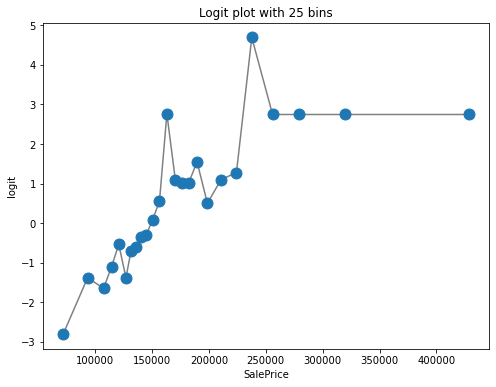

In [48]:
#Step-4 Plotting Logit against avg SalePrice 

plt.figure(figsize=(8,6))
plt.plot(results.avg_sale, 
         results.log_logit,
         color='gray', 
         zorder=-1)
plt.scatter(results.avg_sale, 
         results.log_logit,
            s=120)
plt.xlabel('SalePrice')
plt.ylabel('logit')
plt.title('Logit plot with 25 bins')


Text(0.5, 1.0, 'Logit plot with 25 bins')

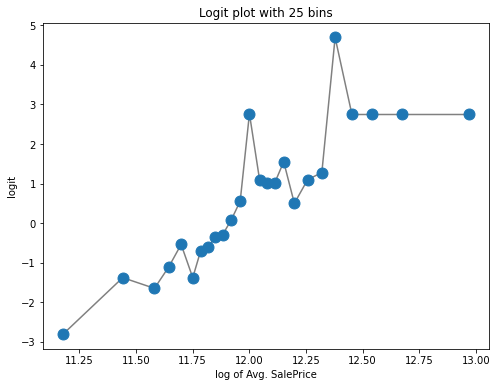

In [49]:
#Step-4 Plotting Logit against log of avg SalePrice 

plt.figure(figsize=(8,6))
plt.plot(results.log_avg_saleprice, 
         results.log_logit,
         color='gray', 
         zorder=-1)
plt.scatter(results.log_avg_saleprice, 
         results.log_logit,
            s=120)
plt.xlabel('log of Avg. SalePrice')
plt.ylabel('logit')
plt.title('Logit plot with 25 bins')